In [6]:
from __future__ import division
import matplotlib
#matplotlib.use('Agg')
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
import numpy as np
import cPickle, h5py, os, glob

from oc_ica import analysis, styles, plotting
reload(analysis)

<module 'oc_ica.analysis' from '/home/jesse/Development/oc_ica/oc_ica/analysis.pyc'>

# HDF5 Storage

In [7]:
base_folder = '/home/jesse/Development/results/oc_ica/'

In [8]:
n_mixtures = 32
OCs = ['1.0', '1.5', '2.0', '2.25', '2.5', '2.75', '3.0', '3.5']
OC_k = 12
priors = ['COHERENCE_SOFT', 'COHERENCE', 'INIT']
keep_max = False

ks = [2, 4, 6, 8, 10, 12, 14, 16]
k_OC = '2.0'

In [5]:
# Only need to run this once
reload(analysis)
for OC in OCs:
    analysis.comparison_analysis_postprocess(base_folder, n_mixtures, OC, OC_k, priors, keep_max, overwrite=True)
    
for k in ks:
    analysis.comparison_analysis_postprocess(base_folder, n_mixtures, k_OC, k, priors, keep_max, overwrite=True)

In [ ]:
OC_k = 6
k_OC = '3.0'

In [ ]:
# Only need to run this once
reload(analysis)
for OC in OCs:
    analysis.comparison_analysis_postprocess(base_folder, n_mixtures, OC, OC_k, priors, keep_max, overwrite=True)
    
for k in ks:
    analysis.comparison_analysis_postprocess(base_folder, n_mixtures, k_OC, k, priors, keep_max, overwrite=True)

# Summary Plots

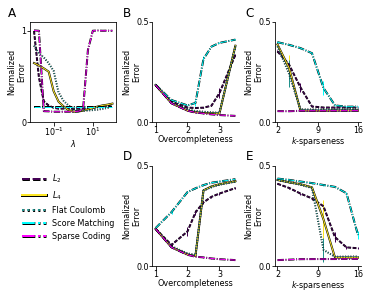

In [14]:
reload(analysis)
reload(plotting)
k_OC = '2.0'
OC_k = 12

results, null_results, lambdas = analysis.comparison_analysis_postprocess(base_folder,
                                                                          n_mixtures, k_OC, OC_k, priors, keep_max)


OCs = ['1.0', '1.5', '2.0', '2.25', '2.5', '2.75', '3.0', '3.5', '4.0']
keep_OCs = ['1.0', '1.5', '2.0', '2.25', '2.5', '2.75', '3.0', '3.5']

#OCs = ['1.0', '1.5']
#keep_OCs = ['1.0', '1.5']

models = ['2', '4', 'COULOMB', 'COULOMB_F', 'RANDOM', 'RANDOM_F', 'SC', 'SM']
#keep_models = ['2', '4', 'COULOMB', 'COULOMB_F', 'RANDOM', 'RANDOM_F', 'SM', 'SC']
keep_models = ['2', '4', 'COULOMB_F', 'SM', 'SC']
#keep_models = models

ks = [2, 4, 6, 8, 10, 12, 14, 16]
#ks = [2, 4]

n_prior = 0
f = plt.figure(figsize=(5, 4))

l_edge = .07125
r_edge = .01
top_edge = .05
bot_edge = .1
width = .25
h_gap = .1
width = (1. - l_edge - r_edge - 2*h_gap) / 3
height = .35
mid_gap = 1 - top_edge - bot_edge - 2 * height

ap = f.add_axes((l_edge, 1 - top_edge - height, width, height))
ax1 = f.add_axes((l_edge + width + h_gap, 1 - top_edge - height, width, height))
ax2 = f.add_axes((l_edge + 2 * width + 2 * h_gap, 1 - top_edge - height, width, height))
ax3 = f.add_axes((l_edge + width + h_gap, bot_edge, width, height))
ax4 = f.add_axes((l_edge + 2 * width + 2 * h_gap, bot_edge, width, height))

plotting.recovery_vs_lambda(models, keep_models, results, null_results, lambdas,
                            priors, n_prior, ap, add_ylabel=True)

plotting.recovery_vs_oc_or_k(models, keep_models, base_folder, n_mixtures,
                              True, ax1, priors, n_prior,
                              OCs=OCs, keep_OCs=keep_OCs, OC_k=OC_k, add_ylabel=True, add_xlabel=True)

plotting.recovery_vs_oc_or_k(models, keep_models, base_folder, n_mixtures,
                              False, ax2, priors, n_prior,
                              ks=ks, k_OC=k_OC, add_ylabel=True, add_xlabel=True)

OC_k = 6
k_OC = '3.0'

plotting.recovery_vs_oc_or_k(models, keep_models, base_folder, n_mixtures,
                              True, ax3, priors, n_prior,
                              OCs=OCs, keep_OCs=keep_OCs, OC_k=OC_k,
                              add_ylabel=True, add_xlabel=True,
                              legend=True)

plotting.recovery_vs_oc_or_k(models, keep_models, base_folder, n_mixtures,
                              False, ax4, priors, n_prior,
                              ks=ks, k_OC=k_OC,
                              add_xlabel=True, add_ylabel=True)
y1 = .965
y2 = .47
x1 = .01
x2 = .33
x3 = .67
f.text(x1, y1, 'A', fontsize=styles.letter_fontsize)
f.text(x2, y1, 'B', fontsize=styles.letter_fontsize)
f.text(x3, y1, 'C', fontsize=styles.letter_fontsize)
f.text(x2, y2, 'D', fontsize=styles.letter_fontsize)
f.text(x3, y2, 'E', fontsize=styles.letter_fontsize)

plt.savefig('/home/jesse/Downloads/figure4.pdf')
#plt.savefig('/home/jesse/Downloads/figure3.png', dpi=100)
plt.show()
plt.close()